# 📈 VectorBT: 15 Lessons in Stock Market Magic

Learn how to use VectorBT to see into the past and test your trading ideas!

In [ ]:
import vectorbt as vbt
vbt.settings.plotting['use_widgets'] = False

import pandas as pd
import numpy as np  

### 1. Download Price Data
Let's fetch the history of Bitcoin (BTC-USD).

In [ ]:
data = vbt.YFData.download('BTC-USD').get('Close')
data.plot().show()

### 2. Buying and Holding
What happens if you buy $1000 worth and just wait?

In [ ]:
pf = vbt.Portfolio.from_holding(data, init_cash=1000)
pf.value().plot().show()

### 3. The 50-Day Smoothing Line
Moving Averages help us see the trend through the noise.

In [ ]:
ma = vbt.MA.run(data, 50)
ma.ma.plot(fig=data.plot()).show()

### 4. Golden Cross Signals
A simple rule: Buy when the fast line goes above the slow line.

In [ ]:
fast = vbt.MA.run(data, 10)
slow = vbt.MA.run(data, 50)
entries = fast.ma_crossed_above(slow)
exits = fast.ma_crossed_below(slow)
entries.vbt.signals.plot_as_entry_marks(data).show()

### Step-by-Step Breakdown

#### 1. Calculating the Moving Averages

Python

```
fast = vbt.MA.run(data, 10)
slow = vbt.MA.run(data, 50)
```

- **`vbt.MA.run`**: This calculates a Simple Moving Average.
    
- **`fast`**: Takes the average price of the last **10 periods**. Because it uses fewer data points, it reacts quickly to price changes.
    
- **`slow`**: Takes the average of the last **50 periods**. It is "lagging" and represents the long-term trend.
    

#### 2. Generating the Trading Signals

Python

```
entries = fast.ma_crossed_above(slow)
exits = fast.ma_crossed_below(slow)
```

These lines create **Boolean masks** (True/False values) for every point in your data:

- **`entries`**: Becomes **True** at the exact moment the 10-period line moves from below to **above** the 50-period line. This is often called a "Golden Cross" and signals a potential price surge.
    
- **`exits`**: Becomes **True** when the 10-period line drops **below** the 50-period line. This is often called a "Death Cross" and signals a potential price drop.
    

#### 3. Visualizing the Strategy

Python

```
entries.vbt.signals.plot_as_entry_markers(data)
```

- This takes your original price data and overlays **markers** (usually green upward triangles) wherever the `entries` variable is `True`.
    
- It allows you to see exactly where your "buy" signals would have occurred in history.
    

---

### The Strategy Logic in a Nutshell

|**Signal**|**Movement**|**Meaning**|
|---|---|---|
|**Entry (Buy)**|Fast crosses **Above** Slow|The short-term momentum is stronger than the long-term trend.|
|**Exit (Sell)**|Fast crosses **Below** Slow|The short-term momentum is weakening relative to the long-term trend.|

### What's Missing?

While you have defined `entries` and `exits`, this code **only plots the entries**. It doesn't actually run a backtest to see how much money you would have made.

**Would you like me to show you the code to calculate the Profit & Loss (PnL) and see the total return for this strategy?**

In [ ]:
# 1. Run the portfolio simulation
# init_cash=1000 starts with $1000
# fees=0.001 adds a 0.1% transaction fee (realistic)
pf = vbt.Portfolio.from_signals(data, entries, exits, init_cash=1000, fees=0.001)

# 2. Print the performance metrics
print(pf.stats())

# 3. Visualize the results
pf.plot().show()

### What happens in this step?

When you call `vbt.Portfolio.from_signals`, the library performs several complex calculations:

- **Trade Execution:** It looks at your `entries` (True) and `exits` (True) and simulates buying at the next available price and selling when the exit signal triggers.
    
- **Capital Management:** It tracks your `init_cash` ($1000) as it moves in and out of the asset.
    
- **Metric Generation:** It calculates key performance indicators (KPIs) like:
    
    - **Total Return:** How much you made/lost in total.
        
    - **Sharpe Ratio:** How much return you got for the risk you took.
        
    - **Max Drawdown:** The biggest "dip" your account took from its peak.
        

### Understanding the Plot

When you run `pf.plot()`, you will see three main sections:

1. **Price Chart:** Your entry/exit markers overlaid on the price.
    
2. **Equity Curve:** A graph showing your account balance growing (or shrinking) over time.
    
3. **Drawdown:** A chart showing the "pain" periods where your account was below its previous high.
    

### A Quick Tip on Results

If the **Total Return** is lower than the **Benchmark Return** (the return you'd get by just buying and holding), it means your strategy didn't beat the market.

**Would you like to see how to optimize the "10" and "50" numbers to find the most profitable combination?**

### 5. Running the Simulation
Let's see the total profit from our Golden Cross strategy.

In [ ]:
pf = vbt.Portfolio.from_signals(data, entries, exits)
print(f'Total Return: {pf.total_return() * 100:.2f}%')

### 6. Comparing Giants
Who grew faster: Apple, Microsoft, or Google?

In [ ]:
multi_stocks = vbt.YFData.download(['AAPL', 'MSFT', 'GOOG']).get('Close')
multi_stocks.ffill().dropna().vbt.normalize().plot()

In [ ]:
start = '2010-01-01 UTC'  
end = '2025-12-25 UTC'
multi_stocks = vbt.YFData.download(['AAPL', 'MSFT', 'GOOG'],
                                   start=start,end=end ).get('Close')
multi_stocks.ffill().dropna().vbt.normalize().plot()

### 7. Monthly Savings (DCA)
Simulating buying a little bit every month.

In [ ]:
entries = pd.Series(False, index=data.index)
entries.iloc[::30] = True
pf_dca = vbt.Portfolio.from_signals(data, entries, None)
pf_dca.value().plot()

In [ ]:
data = vbt.YFData.download('BTC-USD').get('Close')
entries = pd.Series(False, index=data.index)
entries.iloc[::360] = True

# 1. Set a fixed amount to buy each time (e.g., $100)
# 2. Set 'init_cash' to a high enough amount to cover all future buys
# 3. Use 'size_type' to tell vbt that '100' is a cash amount
pf_dca = vbt.Portfolio.from_signals(
    data, 
    entries, 
    None, 
    size=100,           # Buy $100 worth each time
    size_type='value',  # Interpret '100' as a dollar value (not shares)
    init_cash=2000     # Start with enough cash to fund the buys
)

pf_dca.value().plot()


### 8. RSI: Is it Too Hot?
The Relative Strength Index tells us if an asset is oversold or overbought.

In [ ]:
rsi = vbt.RSI.run(data)
rsi.plot().show()

### 1. Code Breakdown

- **`rsi = vbt.RSI.run(data)`**: This calculates the **Relative Strength Index (RSI)** using the closing prices you downloaded earlier. By default, VectorBT uses a **14-period** window (the standard for RSI).
    
- **`rsi.plot()`**: This generates a line chart of the RSI values, typically ranging from **0 to 100**.
    

### 2. Interpreting the RSI Values

The RSI is a "momentum oscillator." It measures the speed and change of price movements. To understand the plot, you look for three key zones:

- **Overbought (Above 70):** When the line crosses above 70, it suggests the asset has been bought aggressively and might be "overextended." This is often interpreted as a signal that a price correction or a trend reversal to the downside might be coming.
    
- **Oversold (Below 30):** When the line drops below 30, it suggests the asset has been sold heavily and might be "undervalued." Traders often look at this as a potential buying opportunity or a sign that the downtrend is losing steam.
    
- **Neutral (30 to 70):** The asset is in a normal trading range.
    

### 3. Using RSI in VectorBT

The real power of doing this in VectorBT is that you can automatically generate signals based on these levels. For example:

Python

```
# Create signals: Buy when RSI crosses below 30, Sell when it crosses above 70
entries = rsi.rsi_below(30)
exits = rsi.rsi_above(70)

# Run a new backtest based on these RSI signals
pf_rsi = vbt.Portfolio.from_signals(data, entries, exits)
print(pf_rsi.total_return())
```

### Why use RSI instead of DCA?

While your previous code (DCA) bought Bitcoin every 30 days regardless of price, an **RSI strategy** tries to be "smart" by only buying when the price is relatively low (oversold) and selling when it is relatively high (overbought).

### 9. Buying the Dip with RSI
A strategy: Buy when RSI is below 30.

In [ ]:
entries = rsi.rsi_below(30)
exits = rsi.rsi_above(70)
pf_rsi = vbt.Portfolio.from_signals(data, entries, exits)
pf_rsi.stats()

### 10. Drawdowns: The Scary Drops
Seeing the peak-to-trough declines.

In [ ]:
pf_rsi.drawdowns.plot()

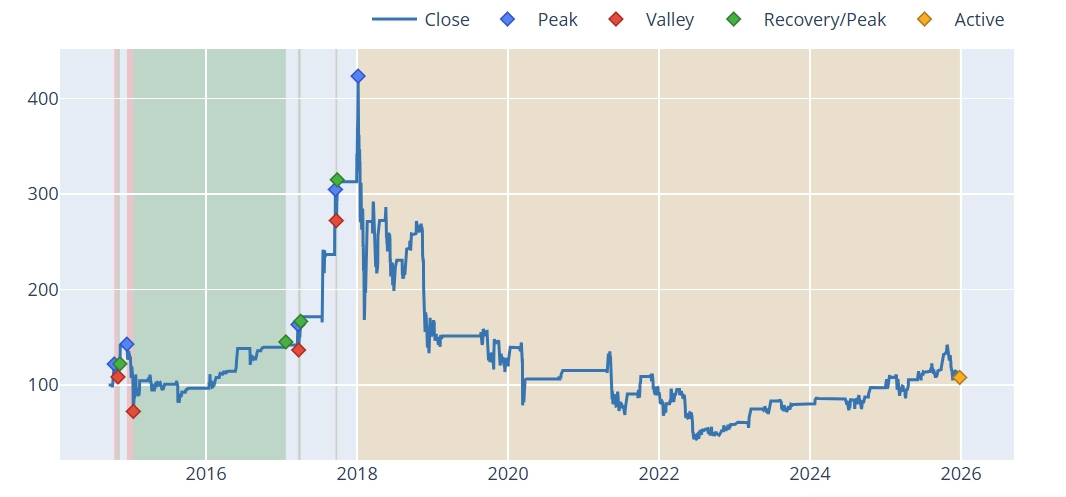

### What are you looking at?

When you run this corrected line, you are looking at a **Drawdown Chart**. In trading, a drawdown measures the "peak-to-trough" decline during a specific period for an investment.

- **The Top Line (0%):** This represents the portfolio being at an all-time high.
    
- **The Valleys (Negative %):** These show how much money you "lost" from the peak before the price recovered.
    
- **Interpretation:** If the chart drops to -50%, it means at that point in time, your portfolio value was half of what it was at its highest point.
    



This is a detailed visualization of how your portfolio's value dropped from its highest points (peaks) to its lowest points (valleys) before recovering.

### Key Components of the Chart

- **Blue Line (Close):** This represents your portfolio value over time.
    
- **Blue Diamonds (Peak):** These marks identify the **highest value** your portfolio reached before a drop occurred.
    
- **Red Diamonds (Valley):** These marks identify the **lowest point** reached during a specific drawdown period.
    
- **Green Diamonds (Recovery/Peak):** These indicate the moment the portfolio value returned to its previous peak. This marks the end of a drawdown period.
    
- **Orange Diamond (Active):** This shows that you are currently in an **active drawdown**. The portfolio value is currently below its last all-time high.
    
- **Shaded Regions:**
    
    - **Green Areas:** Historical drawdown periods that have fully recovered.
        
    - **Red/Tan Areas:** Regions where the portfolio was significantly below its previous peak for an extended time. The large tan area starting in 2018 represents a massive, long-term drawdown that has not yet reached a new peak.
        

---

### Understanding "Active" Drawdowns

The **Orange Diamond** at the very end of 2025 is a critical piece of information. It tells you that as of the last data point, your strategy is "underwater."

Even though the blue line (portfolio value) looks like it is trending upward recently, it hasn't yet broken above the massive peak established back in 2018. In trading terms, your strategy has been in a "recovery phase" for years.

### 11. Creating Custom Math Rules
Applying custom transformations to your data.

In [ ]:
import vectorbt as vbt
import pandas as pd

# 1. Get Data
data = vbt.YFData.download('BTC-USD').get('Close')

# 2. Simple Math (No Factory needed!)
# Let's say we want to buy when the price is "low" 
# and sell when it hits a 5% profit target.
target_price = data * 1.05

# 3. Create Signals
# Buy on the first day
entries = pd.Series(False, index=data.index)
entries.iloc[0] = True 

# Exit when the price actually reaches or exceeds our 5% target
exits = data >= target_price.shift(1) 

# 4. Run the Portfolio
pf = vbt.Portfolio.from_signals(data, entries, exits, init_cash=100)

# 5. Show Results
print(pf.total_return())
pf.plot().show()

Here is the step-by-step breakdown:

### 1. Data Acquisition

Python

```
data = vbt.YFData.download('BTC-USD').get('Close')
```

This line reaches out to Yahoo Finance and downloads the historical daily closing prices for Bitcoin. The result is a **Pandas Series** where the index is the date and the value is the price.

---

### 2. Setting the "Goal" (The Math)

Python

```
target_price = data * 1.05
```

This creates a "shadow" version of your data. For every single day in history, it calculates what a **5% price increase** would look like.

- If BTC is at $60,000, the `target_price` for that day is $63,000.
    

---

### 3. Logic: When to Enter and Exit

Python

```
entries = pd.Series(False, index=data.index)
entries.iloc[0] = True 
```

- **Entries:** It creates a list of "False" (don't buy) for every day, then forces the very first day (`iloc[0]`) to "True." You are essentially telling the computer: **"Buy Bitcoin on the first day data is available."**
    

Python

```
exits = data >= target_price.shift(1) 
```

- **Exits:** This is a logical comparison. It looks at the actual price (`data`) and checks if it is greater than or equal to the target set on the previous day (`shift(1)`).
    
- The moment this becomes **True**, the strategy triggers a sell.
    

---

### 4. The Simulation Engine

Python

```
pf = vbt.Portfolio.from_signals(data, entries, exits, init_cash=100)
```

This is where the "heavy lifting" happens. VectorBT takes your $100 (`init_cash`), buys BTC on your `entries` date, and holds it until the `exits` condition is met. It handles all the math of how many "fractions" of Bitcoin you own and what your cash balance is.

---

### 5. Visualizing Performance

Python

```
print(pf.total_return())
pf.plot().show()
```

- **Total Return:** Prints your percentage profit (e.g., `0.05` would be a 5% gain).
    
- **Plot:** Generates a three-part interactive chart:
    
    1. **Price Chart:** Shows the Bitcoin price with markers (green triangles for buy, red for sell).
        
    2. **Orders:** Shows exactly when the buy/sell orders were executed.
        
    3. **Equity Curve:** Shows your $100 growing (or shrinking) over time.
        

### Why `shift(1)` is important

In the exit logic, we use `.shift(1)` to avoid "Look-Ahead Bias." In real life, you don't know today's closing price until the day is over. By shifting, we ensure the strategy is selling based on a target price calculated _yesterday_.

### 12. Real-World Fees
Simulating commission costs.

In [ ]:
pf_expensive = vbt.Portfolio.from_signals(data, entries, exits, fees=0.01)
print(f'Total Return with Fees: {pf_expensive.total_return()}')

### 13. Building a 50/50 Portfolio
Balancing two different assets.

In [ ]:
import vectorbt as vbt
import pandas as pd
import numpy as np

# 1. Download and Clean
data = vbt.YFData.download(['AAPL', 'BTC-USD']).get('Close')
clean_data = data.ffill().dropna()

# 2. Create a weights DataFrame that matches the shape of clean_data
# This tells vectorbt: "At every timestamp, I want 50% in AAPL and 50% in BTC"
weights = pd.DataFrame(
    np.tile([0.5, 0.5], (len(clean_data), 1)), 
    index=clean_data.index, 
    columns=clean_data.columns
)

# 3. Use from_orders with the aligned weights
pf_mixed = vbt.Portfolio.from_orders(
    close=clean_data, 
    size=weights, 
    size_type='targetpercent',
    group_by=False,
    cash_sharing=True # Important for multi-asset portfolios
)

pf_mixed.value().plot()

### 14. Stop Loss Protection
Automatically selling to limit losses.

In [ ]:
import vectorbt as vbt
import pandas as pd
import numpy as np

# 1. Prepare your data (Example using Yahoo Finance)
# Replace 'AAPL' with your data source or DataFrame
data = vbt.YFData.download('AAPL', period='1y').get('Close')

# 2. Define your logic to create BOOLEAN signals
# The .vbt.signals accessor ONLY works on True/False data
fast_ma = data.vbt.rolling_mean(window=10)
slow_ma = data.vbt.rolling_mean(window=50)

# This creates a Series of True/False
entries = data.vbt.crossed_above(slow_ma) 

# 3. (Optional) Refine signals using the signals accessor
# Now that 'entries' is boolean, .vbt.signals will work
# clean_entries ensures we don't get multiple signals in a row
entries = entries.vbt.signals.clean()

# 4. Create the Portfolio
# Use the original 'data' (floats) and the 'entries' (bools)
pf_safe = vbt.Portfolio.from_signals(
    close=data, 
    entries=entries, 
    exits=None, 
    sl_stop=0.05,
    freq='d' # Set frequency (d=daily) for accurate metrics
)

# 5. Visualize
pf_safe.plot()

### 15. The Final Report Card
Getting a complete performance summary.

In [ ]:
print(pf_safe.stats())

pf_safe.plot(subplots=['cum_returns', 'drawdowns']).show()

### What to Look For in the Output

When you run this, pay close attention to these key metrics:

- **Start / End**: The time range of your backtest.
    
- **Total Return [%]**: The raw percentage gain/loss.
    
- **Max Drawdown [%]**: The largest "peak-to-trough" decline. This tells you the risk you would have endured.
    
- **Sharpe Ratio**: A measure of risk-adjusted return (higher is better; $>1.0$ is generally considered good).
    
- **Win Rate [%]**: The percentage of closed trades that were profitable.
    
- **Expectancy**: The average amount you expect to win (or lose) per trade.

In [ ]:
# See every trade executed, its entry/exit price, and PnL
print(pf_safe.trades.records_readable)

# Get stats specifically for the trades
print(pf_safe.trades.stats())